In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def p2f(x):
    return float(x.strip('%'))

In [4]:
df = pd.read_csv('food_2019-06-27T22-32-47.csv',
                 index_col='name').dropna(axis=1)

In [5]:
df

,brand,dma_ash,dma_cals,dma_carbs,dma_fat,dma_fiber,dma_prot,dry_wet,ga_ash,ga_carbs,ga_fat,ga_fiber,ga_moist,ga_prot,ingredients,ingredients_paws,nutrition_paws
name,,,,,,,,,,,,,,,,,
Weight Control,1st choice,10%,313/100g,40%,11%,7%,32%,dry,9.0%,36.0%,10.0%,6.0%,10.0%,29.0%,"Chicken,chicken meal,rice,pea protein,brown ri...",[3],[2]
Holistic Feline Formula,bench & field,2%,399/100g,37%,22%,3%,36%,dry,1.9%,33.3%,20.0%,2.8%,10.0%,32.0%,"Chicken Meal,Ground Brown Rice,Chicken Fat (pr...",[3],[2]
Turkey & Tuna Twinkles,bff,0%,71/100g,18%,18%,6%,59%,wet,0.0%,3.0%,3.0%,1.0%,83.0%,10.0%,"Turkey Broth,Turkey,Tuna,Sardine,Dried Egg,Nat...",[3],[4]
Salmon & Brown Rice Formula,avoderm,8%,367/100g,30%,20%,4%,38%,dry,7.0%,27.0%,18.0%,4.0%,10.0%,34.0%,"Salmon Meal,Salmon (Source of Omega 3),Ground ...",[2],[2]
Adult Maintenance Formula,beaverdam,0%,365/100g,50%,13%,3%,33%,dry,0.0%,45.0%,12.0%,3.0%,10.0%,30.0%,"Chicken Meal,Whole Grain Sorghum,Chicken Fat (...",[2],[1]
"Adult Turkey, Tripe & Veggie Recipe",blackwood,14%,82/100g,30%,16%,2%,39%,wet,3.0%,6.5%,3.5%,0.5%,78.0%,8.5%,"Turkey Broth,Turkey,Lamb Tripe,Peas,Pumpkin Pu...",[2],[2]
Wilderness Weight Control Chicken,blue buffalo,0%,351/100g,38%,13%,9%,40%,dry,0.0%,35.0%,12.0%,8.0%,9.0%,36.0%,"Deboned Chicken,Chicken Meal,Tapioca Starch,Pe...",[3],[2]
Grain Free Cat Diet,best breed,9%,348/100g,22%,19%,8%,42%,dry,8.0%,20.0%,17.0%,7.0%,10.0%,38.0%,"Chicken Meal,Egg Product,Chicken Fat (Preserve...",[4],[3]
Chef's Entrees Stew - Salmon & Shrimp Chowder,authority,0%,70/100g,33%,11%,6%,50%,wet,0.0%,6.0%,2.0%,1.0%,82.0%,9.0%,"Fish Broth,Salmon,Chicken,Chicken Liver,Dried ...",[3],[3]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3093 entries, Weight Control to Hearty Cuts With Real Beef & Chicken In Gravy
Data columns (total 17 columns):
brand               3093 non-null object
dma_ash             3093 non-null object
dma_cals            3093 non-null object
dma_carbs           3093 non-null object
dma_fat             3093 non-null object
dma_fiber           3093 non-null object
dma_prot            3093 non-null object
dry_wet             3093 non-null object
ga_ash              3093 non-null object
ga_carbs            3093 non-null object
ga_fat              3093 non-null object
ga_fiber            3093 non-null object
ga_moist            3093 non-null object
ga_prot             3093 non-null object
ingredients         3093 non-null object
ingredients_paws    3093 non-null object
nutrition_paws      3093 non-null object
dtypes: object(17)
memory usage: 435.0+ KB


In [7]:
p_cols = [col for col in df.columns if '%' in df[col][0]]
p_cols

['dma_ash',
 'dma_carbs',
 'dma_fat',
 'dma_fiber',
 'dma_prot',
 'ga_ash',
 'ga_carbs',
 'ga_fat',
 'ga_fiber',
 'ga_moist',
 'ga_prot']

In [8]:
paw_cols = ['ingredients_paws', 'nutrition_paws']

In [9]:
for col in p_cols:
    df[col] = df[col].str.rstrip('%').astype('float')

In [10]:
for col in paw_cols:
    df[col] = df[col].str[1].astype('float')

In [11]:
df['dma_cals'] = df['dma_cals'].map(lambda x:x.split('/')[0].replace(',', '')).astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3093 entries, Weight Control to Hearty Cuts With Real Beef & Chicken In Gravy
Data columns (total 17 columns):
brand               3093 non-null object
dma_ash             3093 non-null float64
dma_cals            3093 non-null float64
dma_carbs           3093 non-null float64
dma_fat             3093 non-null float64
dma_fiber           3093 non-null float64
dma_prot            3093 non-null float64
dry_wet             3093 non-null object
ga_ash              3093 non-null float64
ga_carbs            3093 non-null float64
ga_fat              3093 non-null float64
ga_fiber            3093 non-null float64
ga_moist            3093 non-null float64
ga_prot             3093 non-null float64
ingredients         3093 non-null object
ingredients_paws    3093 non-null float64
nutrition_paws      3093 non-null float64
dtypes: float64(14), object(3)
memory usage: 515.0+ KB


In [13]:
df.head()

,brand,dma_ash,dma_cals,dma_carbs,dma_fat,dma_fiber,dma_prot,dry_wet,ga_ash,ga_carbs,ga_fat,ga_fiber,ga_moist,ga_prot,ingredients,ingredients_paws,nutrition_paws
name,,,,,,,,,,,,,,,,,
Weight Control,1st choice,10.0,313.0,40.0,11.0,7.0,32.0,dry,9.0,36.0,10.0,6.0,10.0,29.0,"Chicken,chicken meal,rice,pea protein,brown ri...",3.0,2.0
Holistic Feline Formula,bench & field,2.0,399.0,37.0,22.0,3.0,36.0,dry,1.9,33.3,20.0,2.8,10.0,32.0,"Chicken Meal,Ground Brown Rice,Chicken Fat (pr...",3.0,2.0
Turkey & Tuna Twinkles,bff,0.0,71.0,18.0,18.0,6.0,59.0,wet,0.0,3.0,3.0,1.0,83.0,10.0,"Turkey Broth,Turkey,Tuna,Sardine,Dried Egg,Nat...",3.0,4.0
Salmon & Brown Rice Formula,avoderm,8.0,367.0,30.0,20.0,4.0,38.0,dry,7.0,27.0,18.0,4.0,10.0,34.0,"Salmon Meal,Salmon (Source of Omega 3),Ground ...",2.0,2.0
Adult Maintenance Formula,beaverdam,0.0,365.0,50.0,13.0,3.0,33.0,dry,0.0,45.0,12.0,3.0,10.0,30.0,"Chicken Meal,Whole Grain Sorghum,Chicken Fat (...",2.0,1.0


In [14]:
g_brand = df.groupby('brand').mean().sort_values('nutrition_paws', ascending=False)

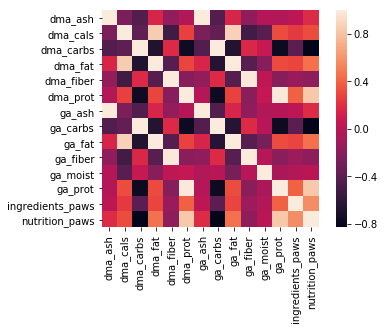

In [15]:
sns.heatmap(df[df['dry_wet'] == 'dry'].corr(), square=True)

In [16]:
df['ingredient_len'] = df['ingredients'].apply(len)

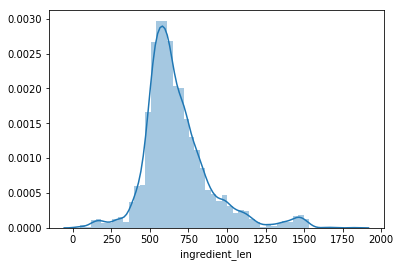

In [17]:
sns.distplot(df['ingredient_len'])

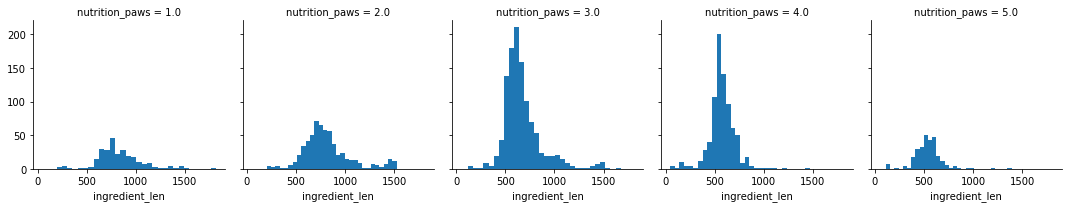

In [18]:
g = sns.FacetGrid(data=df, col='nutrition_paws')
g = g.map(plt.hist, 'ingredient_len', bins=30)

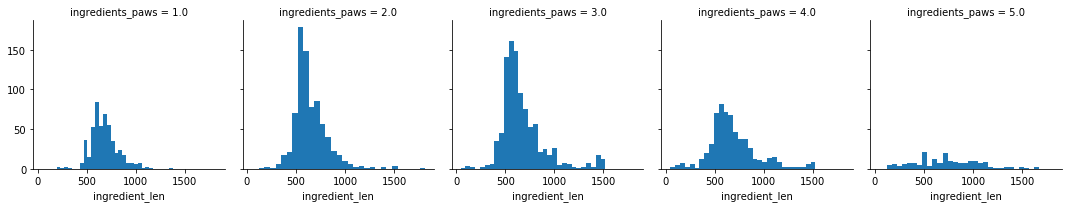

In [19]:
g = sns.FacetGrid(data=df, col='ingredients_paws')
g = g.map(plt.hist, 'ingredient_len', bins=30)

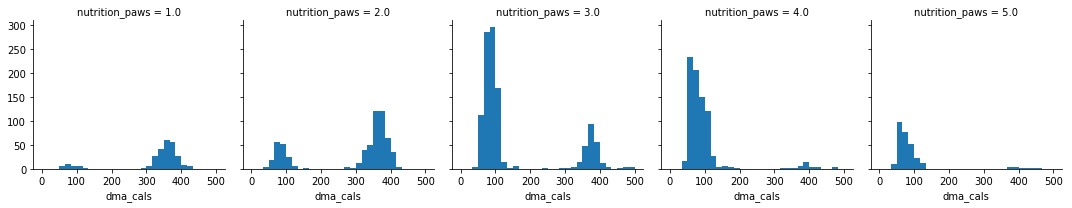

In [20]:
g = sns.FacetGrid(data=df, col='nutrition_paws')
g = g.map(plt.hist, 'dma_cals', bins=30, range=[0, 500])

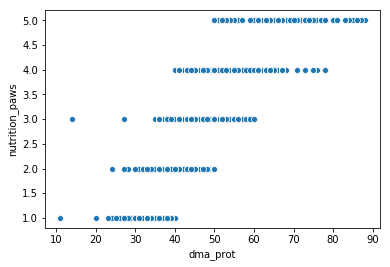

In [21]:
sns.scatterplot(x='dma_prot', y='nutrition_paws', data=df)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [178]:
lr = LinearRegression()

In [211]:
predictor_list = ['dma_ash', 'dma_cals', 'dma_prot', 'dma_carbs', 'dma_fat']
X = df[predictor_list]
y = df['nutrition_paws']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [212]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
y_pred = lr.predict(X_test)

In [214]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [215]:
print("MAE: {}".format(mean_absolute_error(y_test, y_pred)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred)))
print("R2: {}".format(r2_score(y_test, y_pred)))

MAE: 0.3290277544872237
MSE: 0.1596286037807721
R2: 0.8694133756314708


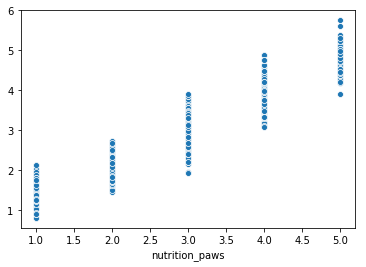

In [216]:
sns.scatterplot(x=y_test, y=y_pred)